In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("img/fish.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
def show_rgb(image):
    image_rgb = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [24]:
def convolve(image, kernel):
    #Only kernels with a centre cell
    assert (kernel.shape[0] == kernel.shape[1]) and kernel.shape[0]%2 == 1

    kernel_y, kernel_x = kernel.shape
    
    x_padding, y_padding = kernel_x // 2, kernel_y // 2

    #Add padding so we can do convolution on every cell of the input image. Makes sure that output image is of same size.
    padded_image = np.zeros((image.shape[0] + y_padding*2, image.shape[1] + x_padding*2))
    padded_image[y_padding : -y_padding, x_padding : -x_padding] = image

    output = np.zeros(image.shape)
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            image_part = padded_image[y : y + kernel_y, x: x + kernel_x]
            output[y, x] = (kernel * image_part).sum()

    #clip function sets -ve values to 0 and values >255 to 255
    output = np.clip(output, 0, 255).astype("uint8")
    return output

In [6]:
blur_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

In [7]:
sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

In [8]:
edge_kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

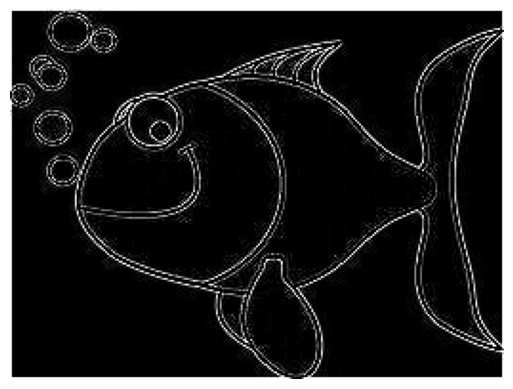

In [25]:
out = convolve(img_gray, edge_kernel)
show_rgb(out)

Other stuff I was just trying:

In [9]:
edge_kernel_vertical = np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])

In [10]:
edge_kernel_horizontal = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

In [17]:
def convolveRGB(image, kernel):
    image_b, image_g, image_r = image[:,:,0], image[:,:,1], image[:,:,2]
    out_b = convolve(image_b, kernel)
    out_g = convolve(image_g, kernel)
    out_r = convolve(image_r, kernel)

    out = np.zeros((image.shape[0], image.shape[1], 3))
    out[:,:,0] = out_b
    out[:,:,1] = out_g
    out[:,:,2] = out_r

    return out

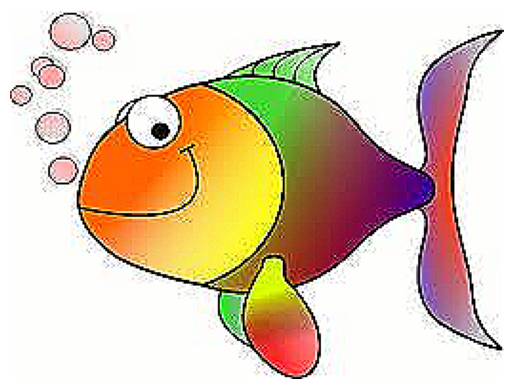

In [18]:
sharpened = convolveRGB(img, sharpen_kernel)
show_rgb(sharpened)